In [302]:
import numpy.random as rand
import numpy as np
import matplotlib.pyplot as plt

In [303]:
def computCost(X, theta, y, R, lamda):
    J = 0
    J = np.sum( ( np.matmul( X, np.transpose(theta) ) * R - y )**2 ) / 2 + lamda * np.sum(theta) / 2 + lamda * np.sum(X)  / 2  
    return J

def normalizeRatings(Y, R):
    m, n = np.shape(Y)
    Ymean = np.zeros((m, 1))
    Ynorm = np.zeros(np.shape(Y))
    for i in range(0, m):
        Ymean[i] = np.mean(Y[i, R[i] == 1])
        Ynorm[i, R[i] == 1] = Y[i, R[i] == 1] - Ymean[i]
    return Ymean, Ynorm

In [304]:
print('visualization of Data...')
a = np.array([[5.,5.,5.,0.,0.],[0.,0.,5.,5.,5.],[5.,5.,5.,0.,0.],[5.,0.,5.,0.,5.],[0.,5.,5.,5.,0.]]) # Training data
R = np.ones(np.shape(a)) # matrix of  gave a rating 
print(a)
m, n = np.shape(a)
Amean = np.zeros((m, 1))
Amean, a = normalizeRatings(a, R)

#Gen fitures
x = np.random.sample((4, 5))
theta = np.random.sample((4, 5))
#x = np.vstack((np.ones((1, 5)), x))
#theta = np.vstack((np.ones((1, 5)), theta))

x  = np.transpose(x)
theta = np.transpose(theta)

print('visualization of parameters x...')
print (x)
print('visualization of parameters theta...')
print (theta)

# useful parametrs
lamda = 1
alpfa = 0.01
step = 1000


visualization of Data...
[[5. 5. 5. 0. 0.]
 [0. 0. 5. 5. 5.]
 [5. 5. 5. 0. 0.]
 [5. 0. 5. 0. 5.]
 [0. 5. 5. 5. 0.]]
visualization of parameters x...
[[0.43067044 0.39076662 0.67781102 0.80048791]
 [0.05403905 0.85569717 0.34999372 0.73779081]
 [0.19315135 0.55789846 0.47932834 0.83357138]
 [0.71312041 0.93678458 0.91032449 0.46959434]
 [0.17427932 0.48104653 0.62627749 0.8437652 ]]
visualization of parameters theta...
[[0.07593445 0.88850358 0.99394543 0.04867566]
 [0.75550025 0.75028905 0.21985513 0.02906248]
 [0.58965846 0.21195202 0.72290114 0.60227962]
 [0.91326216 0.81901847 0.87580212 0.58311156]
 [0.82432522 0.09159844 0.28722662 0.09439729]]


107.60775598763463
Predicting...
[[4.80832729 4.80832729 4.67603704 0.35365419 0.35365419]
 [0.44184769 0.44184769 4.49965003 4.80832729 4.80832729]
 [4.80832729 4.80832729 4.67603704 0.35365419 0.35365419]
 [4.7715341  0.47864088 4.58784353 0.43454413 4.72743735]
 [0.47864088 4.7715341  4.58784353 4.72743735 0.43454413]]
plot cost history...


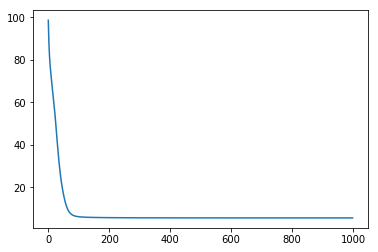

In [305]:
#initial val
initialCost = computCost(x, theta, a, R, lamda) 
print(initialCost)

history = np.zeros((1, 1000000))
i = 0;
# Start Colab. filtering
for k in range(0, step):
    Grad_x = np.matmul((np.matmul(x, np.transpose(theta)) * R - a), theta) + lamda * x
    Grad_theta = np.matmul(np.transpose((np.matmul(x, np.transpose(theta)) * R - a)), x) + lamda * theta
    theta = theta - alpfa * Grad_theta
    x = x - alpfa * Grad_x
    history[0, i] = computCost(x, theta, a, R, lamda)
    i += 1
        #print(computCost(x, theta, a, lamda))
        


#predict
print("Predicting...")
Pred = np.matmul(x, np.transpose(theta)) + Amean
#Pred = np.abs(np.round(Pred, 1))

print(Pred)
#accurancy
#print('accurancy...')
#print(np.average(np.array_equal(Pred, a)) * 100)

#checking
print("plot cost history...")
plt.plot(range(0, i), history[0, range(0, i)])

In [306]:
#Gen features
def GenFeatures (NumFeatures, NumData):
    Xval = np.random.sample((NumFeatures, NumData))
    Xval  = np.transpose(Xval)
    return Xval


 # Colab. filtering
def filtering (x, theta, y, R, lamda, step, alpfa):
    for k in range(0, step):
        Grad_x = np.matmul((np.matmul(x, np.transpose(theta)) * R - y), theta) + lamda * x
        Grad_theta = np.matmul(np.transpose((np.matmul(x, np.transpose(theta)) * R - y)), x) + lamda * theta
        theta = theta - alpfa * Grad_theta
        x = x - alpfa * Grad_x
    return x, theta

#value

def value (pred, y):
    m = np.size(y, 0) * np.size(y, 1)
    return np.sum((pred - y)**2) / m

In [307]:
#cross validation

y = np.array([[5.,0.,5.,5.,5.],[5.,0.,5.,5.,5.],[5.,0.,0.,0.,5.],[0.,5.,0.,5.,5.]]) # cross val realdata without skip
R = np.array([[1.,1.,1.,0.,1.],[0.,1.,1.,1.,1.],[1.,1.,0.,1.,1.],[1.,1.,1.,1.,0.]])
yval = np.array([[5.,0.,5.,0.,5.],[0.,0.,5.,5.,5.],[5.,0.,0.,0.,5.],[0.,5.,0.,5.,0.]]) # cross val traindata with skip
Ymean, yval = normalizeRatings(y, R)
print(Ymean)

# useful parametrs
LamdaVal = [0.1, 0.3, 1., 3., 10., 30.]
AlpfaVal = [0.01, 0.03, 0.1, 0.3]
StepVal = [1000]
Nfeatures = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

BestValue = 1000000;
BestLamda = LamdaVal[0]
BestAlpfa = AlpfaVal[0]
BestStep = StepVal[0]
BestNum = Nfeatures[0]
#start cross validation


for Lamda in LamdaVal:
    for Alpfa in AlpfaVal:
        for Step in StepVal:
            for Num in Nfeatures:
                x = GenFeatures(Num, np.size(yval, 0))
                theta = GenFeatures(Num, np.size(yval, 1))
                x, theta = filtering(x, theta, yval, R, lamda, step, alpfa)
                pred = np.matmul(x, np.transpose(theta)) + Ymean
                val = value(pred, y)
                print('Prediction val = ', val ,'with lamda = ', Lamda, 'alpfa = ', Alpfa, 'num = ', Num, 'step = ', Step, '\n')
                if (val <= BestValue):
                    BestValue = val
                    BestLamda = Lamda
                    BestAlpfa = Alpfa
                    BestStep = Step
                    BestNum = Num
                    
print('result val = ', BestValue ,'with lamda = ', BestLamda, 'alpfa = ', BestAlpfa, 'num =', BestNum, 'step = ', BestStep, '\n')
#predict cross val

print('predict cross val...\n')
x = GenFeatures(BestNum, np.size(yval, 0))
theta = GenFeatures(BestNum, np.size(yval, 1))
x, theta = filtering(x, theta, yval, R, BestLamda, BestStep, BestAlpfa)
pred = np.matmul(x, np.transpose(theta)) + Ymean
print('result\n', pred)

[[3.75]
 [3.75]
 [2.5 ]
 [2.5 ]]
Prediction val =  2.7684707759463416 with lamda =  0.1 alpfa =  0.01 num =  1 step =  1000 

Prediction val =  2.177945806686523 with lamda =  0.1 alpfa =  0.01 num =  3 step =  1000 

Prediction val =  2.177955629089168 with lamda =  0.1 alpfa =  0.01 num =  5 step =  1000 

Prediction val =  2.1776507664764386 with lamda =  0.1 alpfa =  0.01 num =  7 step =  1000 

Prediction val =  2.17785057604008 with lamda =  0.1 alpfa =  0.01 num =  9 step =  1000 

Prediction val =  2.177618129041768 with lamda =  0.1 alpfa =  0.01 num =  11 step =  1000 

Prediction val =  2.177687957905399 with lamda =  0.1 alpfa =  0.01 num =  13 step =  1000 

Prediction val =  2.1776067314655165 with lamda =  0.1 alpfa =  0.01 num =  15 step =  1000 

Prediction val =  2.1777354506325977 with lamda =  0.1 alpfa =  0.01 num =  17 step =  1000 

Prediction val =  2.1775177612638834 with lamda =  0.1 alpfa =  0.01 num =  19 step =  1000 

Prediction val =  2.7684707759463416 w

Prediction val =  2.177669211490342 with lamda =  1.0 alpfa =  0.03 num =  13 step =  1000 

Prediction val =  2.177628222018142 with lamda =  1.0 alpfa =  0.03 num =  15 step =  1000 

Prediction val =  2.17758838743133 with lamda =  1.0 alpfa =  0.03 num =  17 step =  1000 

Prediction val =  2.177696529202683 with lamda =  1.0 alpfa =  0.03 num =  19 step =  1000 

Prediction val =  2.7684707759463416 with lamda =  1.0 alpfa =  0.1 num =  1 step =  1000 

Prediction val =  2.177893263108552 with lamda =  1.0 alpfa =  0.1 num =  3 step =  1000 

Prediction val =  2.1779396555045474 with lamda =  1.0 alpfa =  0.1 num =  5 step =  1000 

Prediction val =  2.1778178689571632 with lamda =  1.0 alpfa =  0.1 num =  7 step =  1000 

Prediction val =  2.177579885476116 with lamda =  1.0 alpfa =  0.1 num =  9 step =  1000 

Prediction val =  2.1778125916465205 with lamda =  1.0 alpfa =  0.1 num =  11 step =  1000 

Prediction val =  2.177630116835528 with lamda =  1.0 alpfa =  0.1 num =  13 s

Prediction val =  2.1777103980494834 with lamda =  10.0 alpfa =  0.1 num =  11 step =  1000 

Prediction val =  2.1778536064567176 with lamda =  10.0 alpfa =  0.1 num =  13 step =  1000 

Prediction val =  2.1774959541290464 with lamda =  10.0 alpfa =  0.1 num =  15 step =  1000 

Prediction val =  2.1774501182424864 with lamda =  10.0 alpfa =  0.1 num =  17 step =  1000 

Prediction val =  2.177403858495169 with lamda =  10.0 alpfa =  0.1 num =  19 step =  1000 

Prediction val =  2.7684707759463407 with lamda =  10.0 alpfa =  0.3 num =  1 step =  1000 

Prediction val =  2.1779542083005383 with lamda =  10.0 alpfa =  0.3 num =  3 step =  1000 

Prediction val =  2.1776592022312906 with lamda =  10.0 alpfa =  0.3 num =  5 step =  1000 

Prediction val =  2.1777330537623376 with lamda =  10.0 alpfa =  0.3 num =  7 step =  1000 

Prediction val =  2.177746603790719 with lamda =  10.0 alpfa =  0.3 num =  9 step =  1000 

Prediction val =  2.177833653327535 with lamda =  10.0 alpfa =  0.3